# Chiara Gilbert

## Research question/interests

My main interest is where people are spending their money when they visit BC. I want to know whether more people are camping or staying hotels or motels, and if this changes from 2014-2017. (Across all indicators).

### Exploratory Data Analysis

In [76]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import seaborn as sns
import missingno
%matplotlib inline
df = pd.read_csv('../data/raw/tourism.csv')

In [77]:
# Display column and row count
df.shape

(8960, 16)

In [78]:
# Display all column names 
df.columns

Index(['REF_DATE', 'GEO', 'DGUID', 'Indicators', 'Products', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE', 'STATUS',
       'SYMBOL', 'TERMINATED', 'DECIMALS'],
      dtype='object')

In [79]:
# Display a summary of means, distributions, limits and ranges of the data set
df.describe().T

,count,mean,std,min,25%,50%,75%,max
REF_DATE,8960.0,2015.500000,1.500084,2014.0,2014.0,2015.5,2017.0,2017.0
UOM_ID,8960.0,97.100000,48.302696,81.0,81.0,81.0,81.0,242.0
SCALAR_ID,8960.0,6.000000,0.000000,6.0,6.0,6.0,6.0,6.0
VALUE,7521.0,6809.351509,112809.280902,0.0,5.6,37.9,239.6,3910989.7
SYMBOL,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TERMINATED,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DECIMALS,8960.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0


In [80]:
#Shows discrete variables
df.Products.unique()

array(['Total tourism expenditures', 'Total tourism products',
       'Total transportation', 'Passenger air transport',
       'Passenger rail transport', 'Passenger water transport',
       'Interurban, charter and tour bus transport', 'Taxis',
       'Vehicle rental', 'Vehicle repairs and parts', 'Vehicle fuel',
       'Total accommodation', 'Hotels', 'Motels', 'Camping',
       'Other accommodation', 'Total food and beverage services',
       'Meals from accommodation', 'Meals from restaurants',
       'Alcoholic beverages from accommodation',
       'Alcoholic beverages from restaurants',
       'Meals and alcoholic beverages from other tourism industries',
       'Total other tourism products', 'Recreation and entertainment',
       'Travel services', 'Convention fees', 'Pre-trip expenses',
       'Total other products', 'Groceries',
       'Beer, wine, and liquor from stores', 'Urban transit and parking',
       'Miscellaneous products'], dtype=object)

In [81]:
#I want to display the number of data pieces for each variable I want to address
df.Products.value_counts()

Total tourism expenditures                                     280
Total tourism products                                         280
Urban transit and parking                                      280
Beer, wine, and liquor from stores                             280
Groceries                                                      280
Total other products                                           280
Pre-trip expenses                                              280
Convention fees                                                280
Travel services                                                280
Recreation and entertainment                                   280
Total other tourism products                                   280
Meals and alcoholic beverages from other tourism industries    280
Alcoholic beverages from restaurants                           280
Alcoholic beverages from accommodation                         280
Meals from restaurants                                        

In [82]:
#Chart 
pd.DataFrame(df.groupby("Products").mean()["VALUE"]).sort_values(by=['VALUE'], ascending=False)

,VALUE
Products,
Miscellaneous products,61600.746429
Total tourism expenditures,58989.105357
Total other products,51565.460357
Total tourism products,7426.941786
Total transportation,3221.840714
Groceries,2071.716071
Total food and beverage services,1840.027857
Meals from restaurants,1508.238839
Passenger air transport,1276.406696


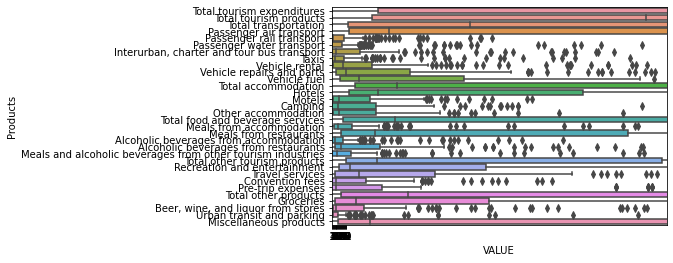

In [83]:
ax = sns.boxplot(x="VALUE", y="Products", data=df)
ax.set_xlim(1,700)
ax.set_xticks(range(1,32))
plt.show()

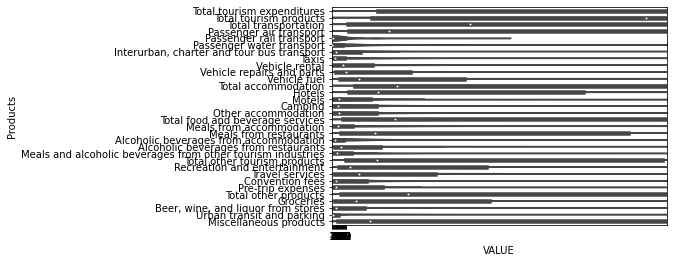

In [84]:
ax = sns.violinplot(x="VALUE", y="Products", data=df)
ax.set_xlim(1,700)
ax.set_xticks(range(1,32))
plt.show()

### Analysis Pipeline

In [85]:
#Here, I am cleaning my data.
#First, I will load the data and drop unused columns.
df = pd.read_csv('../data/raw/tourism.csv')

to_dropColumns = ['DGUID', 'SCALAR_ID', 'VECTOR', 'UOM_ID', 'Indicators', 'SCALAR_FACTOR','COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS']
df.drop(to_dropColumns, inplace=True, axis=1)

#Second,I will rename the columns so that I can distinguish them with more relevant names.
df.rename(columns={'REF_DATE': 'Year', 'GEO': 'Province', 'VALUE':'Dollar Value in Millions', 'Products':'Accommodation'}, inplace=True)

#Third, I will drop the rows that I will not be using in the data analysis.
df2 = df[df['Province'].isin(['British Columbia'])]
df3 = df2[df2['Accommodation'].isin(['Hotels', 'Motels', 'Camping',
       'Other accommodation'])]
df4 = df3[df3['UOM'].isin(['Dollars'])]


#And finally, here I will drop NaN values, missing values, so that they do not interfere with my analysis later.
df4.dropna()




,Year,Province,Accommodation,UOM,Dollar Value in Millions
3212,2014,British Columbia,Hotels,Dollars,1952.7
3213,2014,British Columbia,Motels,Dollars,140.5
3214,2014,British Columbia,Camping,Dollars,139.5
3215,2014,British Columbia,Other accommodation,Dollars,151.8
3244,2014,British Columbia,Hotels,Dollars,1825.9
3245,2014,British Columbia,Motels,Dollars,137.9
3246,2014,British Columbia,Camping,Dollars,129.5
3247,2014,British Columbia,Other accommodation,Dollars,142.7
3276,2014,British Columbia,Hotels,Dollars,424.4
3277,2014,British Columbia,Motels,Dollars,42.7


### Method Chaining

In [86]:
#Here is the method chain to do the above work. I have wrapped it in a function to be exported to a py.file later in this section.


def load_and_process(url_or_path_to_csv_file):
    mylist = ['Hotels', 'Motels', 'Camping', 'Other accommodation']
    pattern = '|'.join(mylist)
    df = pd.read_csv(url_or_path_to_csv_file)
    df = (  
        df.rename(columns={'REF_DATE': 'Year', 'GEO': 'Province', 'VALUE':'Dollar Value in Millions', 'Products':'Accomodation'})
        .drop(columns=['DGUID', 'SCALAR_ID', 'VECTOR', 'UOM_ID', 'Indicators', 'SCALAR_FACTOR','COORDINATE', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'],axis=1)
        .loc[lambda row: df['Products'].str.contains(pattern)==True]
        .loc[lambda row: df['GEO'].str.contains('British Columbia')==True]
        .dropna()
        )
    return df

df= load_and_process('../data/raw/tourism.csv')
print(df)

      Year          Province         Accomodation         UOM  \
3212  2014  British Columbia               Hotels     Dollars   
3213  2014  British Columbia               Motels     Dollars   
3214  2014  British Columbia              Camping     Dollars   
3215  2014  British Columbia  Other accommodation     Dollars   
3244  2014  British Columbia               Hotels     Dollars   
...    ...               ...                  ...         ...   
7919  2017  British Columbia  Other accommodation     Dollars   
7980  2017  British Columbia               Hotels  Percentage   
7981  2017  British Columbia               Motels  Percentage   
7982  2017  British Columbia              Camping  Percentage   
7983  2017  British Columbia  Other accommodation  Percentage   

      Dollar Value in Millions  
3212                    1952.7  
3213                     140.5  
3214                     139.5  
3215                     151.8  
3244                    1825.9  
...                  

#### Export to .py file

In [87]:
import project_functions2

df = project_functions2.load_and_process('../data/raw/tourism.csv')
df


#df.to_csv('tourism-filtered-Chiara.csv')

,Year,Province,Accomodation,UOM,Dollar Value in Millions
12,2014,Canada,Hotels,Dollars,10692.5
13,2014,Canada,Motels,Dollars,933.2
14,2014,Canada,Camping,Dollars,1087.9
15,2014,Canada,Other accommodation,Dollars,855.6
44,2014,Canada,Hotels,Dollars,9336.1
...,...,...,...,...,...
8879,2017,Nunavut,Other accommodation,Dollars,0.4
8940,2017,Nunavut,Hotels,Percentage,82.6
8941,2017,Nunavut,Motels,Percentage,35.1
8942,2017,Nunavut,Camping,Percentage,96.4


### Visualizations for my Analysis

In [88]:
pd.DataFrame(df.groupby("Accomodation").mean()["Dollar Value in Millions"]).sort_values(by=['Dollar Value in Millions'], ascending=False)

,Dollar Value in Millions
Accomodation,
Hotels,763.511161
Camping,78.059375
Other accommodation,74.232143
Motels,61.981696


<Figure size 1440x1080 with 0 Axes>

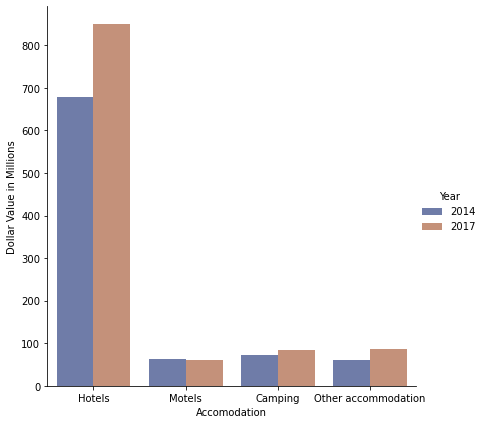

In [95]:
sns.set
plt.figure(figsize = (20,15))

g = sns.catplot(
    data=df, kind="bar",
    x="Accomodation", y="Dollar Value in Millions", hue="Year", 
    ci=None, palette="dark", alpha=.6, height=6
)


<AxesSubplot:xlabel='Year', ylabel='Dollar Value in Millions'>

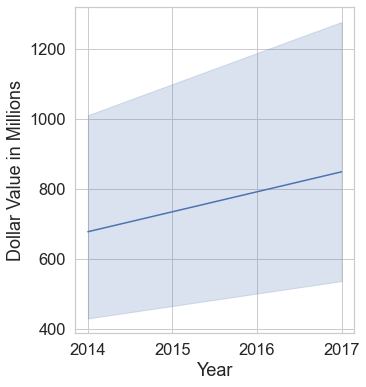

In [110]:
sns.set
plt.figure(figsize = (5,6))
hotel_Growth = df.query("Accomodation == 'Hotels'")
sns.lineplot(data=hotel_Growth, x="Year", y="Dollar Value in Millions")

<AxesSubplot:xlabel='Year', ylabel='Dollar Value in Millions'>

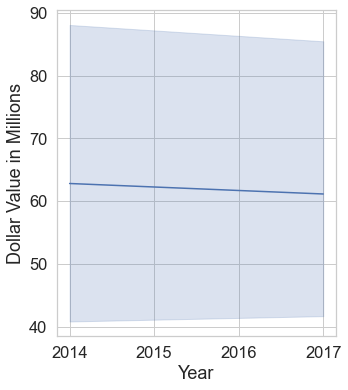

In [111]:
sns.set
plt.figure(figsize = (5,6))
motel_Growth = df.query("Accomodation == 'Motels'")
sns.lineplot(data=motel_Growth, x="Year", y="Dollar Value in Millions")

<AxesSubplot:xlabel='Year', ylabel='Dollar Value in Millions'>

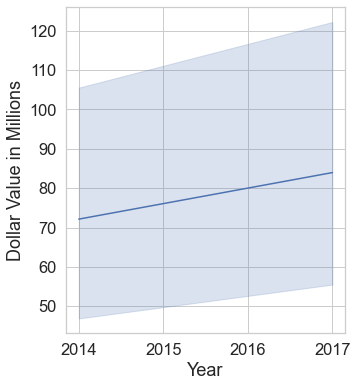

In [112]:
sns.set
plt.figure(figsize = (5,6))
camping_Growth = df.query("Accomodation == 'Camping'")
sns.lineplot(data=camping_Growth, x="Year", y="Dollar Value in Millions")

<AxesSubplot:xlabel='Year', ylabel='Dollar Value in Millions'>

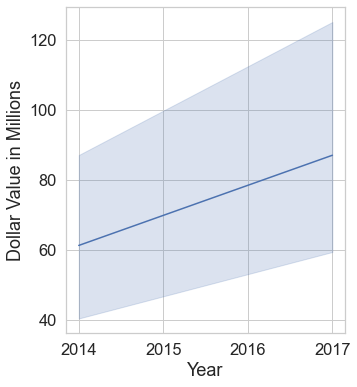

In [113]:
sns.set
plt.figure(figsize = (5,6))
other_Growth = df.query("Accomodation == 'Other accommodation'")
sns.lineplot(data=other_Growth, x="Year", y="Dollar Value in Millions")

C:\Users\Chia\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


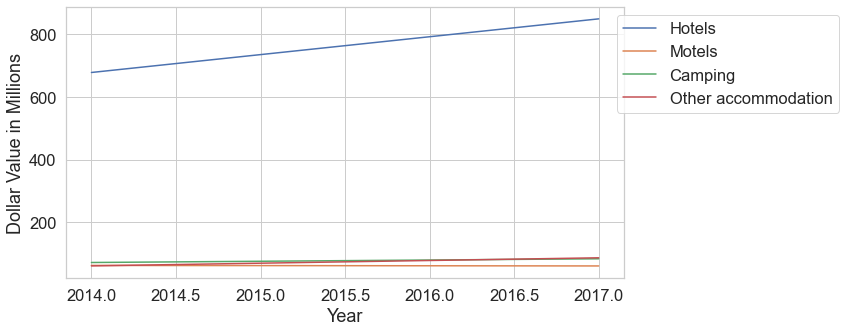

In [109]:
sns.set(style="whitegrid", font_scale = 1.5)
plt.figure(figsize = (10,5))
lp = sns.lineplot('Year', 'Dollar Value in Millions', ci=None, 
             hue='Accomodation', linewidth=1.5, data=df)
lp.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

### Conclusions

From these visualizations, I can see that Hotels are by far the most common choice of accommodation to tourists visiting British Columbia, for both 2014 and 2017. The second most popular option in 2014 was camping, however the growth in revenue for other types of accommodation resulted in its second place standing for 2017. The revenue aquired by motels remained very similar between 2014 and 2017.